In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

In [3]:
fake.shape

(23481, 4)

In [4]:
real.shape

(21417, 4)

In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
fake.duplicated().sum()

3

In [8]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
fake.duplicated().sum()

3

In [11]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [12]:
real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
real.duplicated().sum()

206

In [14]:
fake_1 = fake.drop_duplicates()
real_1 = real.drop_duplicates()

In [15]:
fake_1.duplicated().sum()

0

In [16]:
real_1.duplicated().sum()

0

In [17]:
#Adding category column
fake_1['Real'] = 0
real_1['Real'] = 1

<ipython-input-17-a6bf05e45dab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_1['Real'] = 0
<ipython-input-17-a6bf05e45dab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_1['Real'] = 1


In [18]:
#Combining real and fake
Data = pd.concat([fake_1, real_1], ignore_index=True, sort=False)

In [19]:
#Shuffle Dataset
from sklearn.utils import shuffle
Data = shuffle(Data)
Data = Data.reset_index(drop = True)

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   Real     44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


Real
0    23478
1    21211
Name: Real, dtype: int64


<AxesSubplot:title={'center':'Distribution of classes'}, xlabel='Real', ylabel='count'>

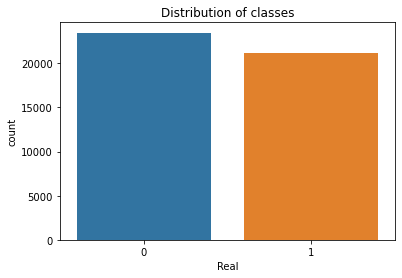

In [21]:
#Class distribution
import seaborn as sb
print(Data.groupby(['Real'])['Real'].count())
plt.title("Distribution of classes")
sb.countplot(x='Real', data=Data)

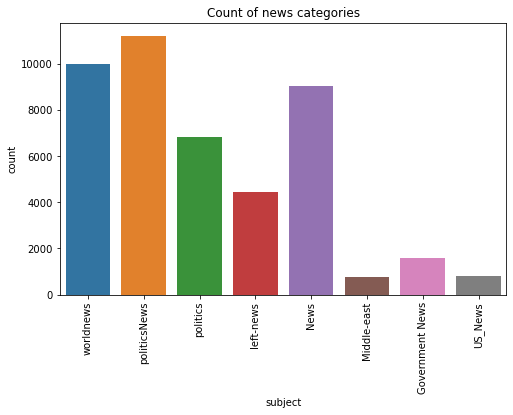

In [22]:
#Split of data by subject
f = plt.figure()
plt.title("Count of news categories")
f.set_figwidth(8)
f.set_figheight(5)
plt.xticks(rotation = 90)
sb.countplot(x = "subject", data =  Data)
plt.show()

In [23]:
#World Cloud of important words in each category
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abrah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


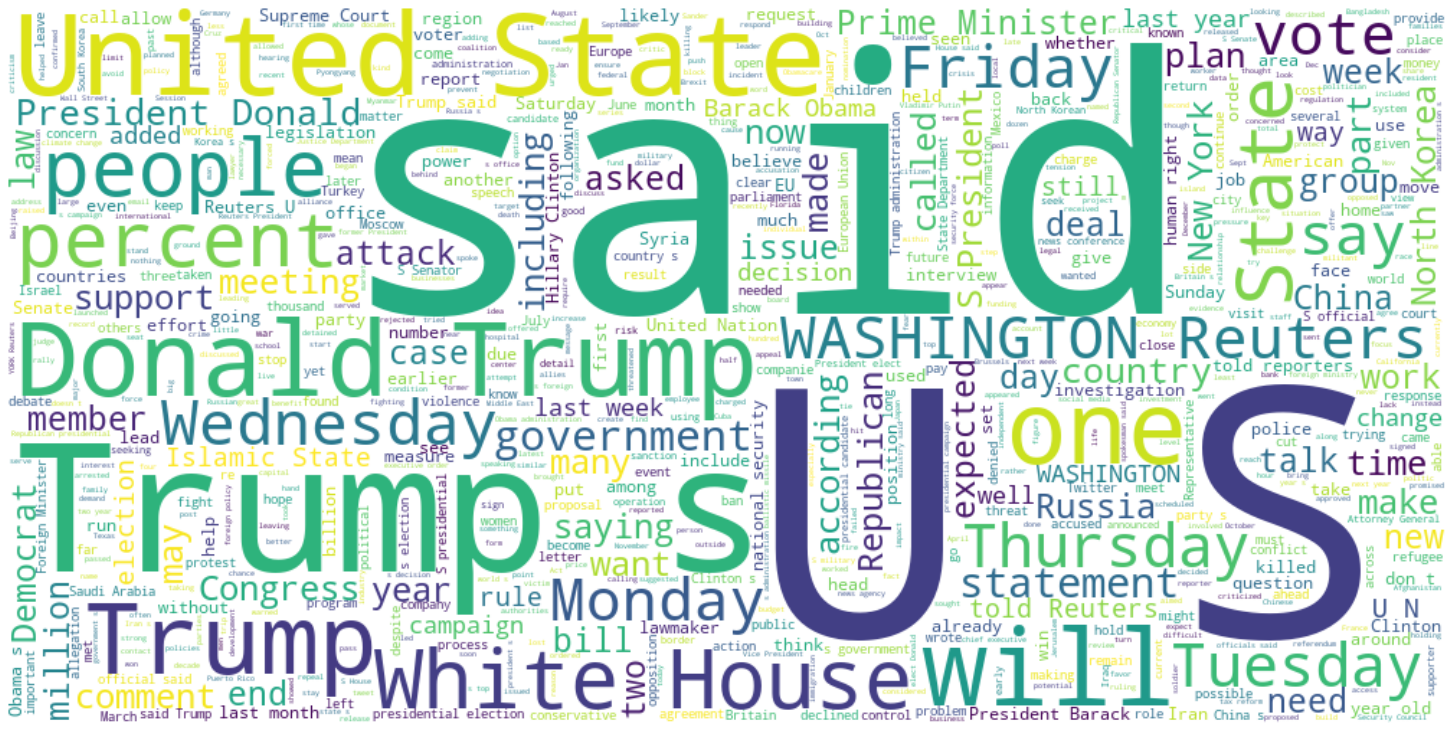

In [24]:
#Word cloud for real news
cloud = WordCloud(max_words = 1000, 
                  width = 1000, 
                  height = 500,
                  stopwords = STOPWORDS, 
                  background_color = "white").generate(" ".join(Data[Data['Real'] == 1].text))
plt.figure(figsize=(20, 15))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

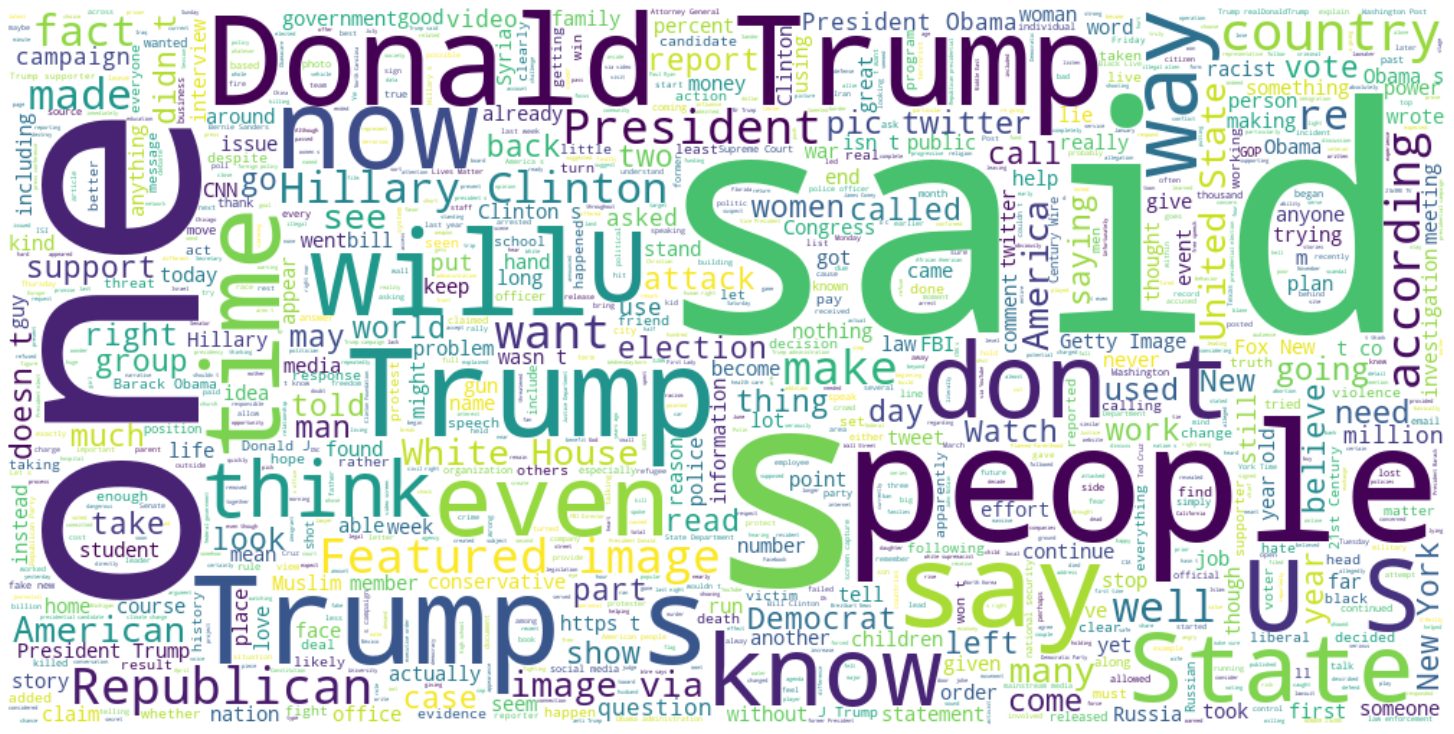

In [25]:
#Word cloud for fake news
cloud = WordCloud(max_words = 1000, 
                  width = 1000, 
                  height = 500,
                  stopwords = STOPWORDS, 
                  background_color = "white").generate(" ".join(Data[Data['Real'] == 0].text))
plt.figure(figsize=(20, 15))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [91]:
#Separate the label column
y = Data.Real
x = Data.text

In [27]:
#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size = 0.33,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29941,) (29941,)
(14748,) (14748,)


In [28]:
#Vectorizer for converting text to numeric values
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vevtorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vevtorizer.fit_transform(X_train)
tfidf_test = tfidf_vevtorizer.transform(X_train)

In [29]:
#Functon for Confusion Matrix

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
#Libraries for model building
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier

In [31]:
#Naive Bayes
nbt_pipeline = Pipeline([
                  ('NBTV',tfidf_vevtorizer),
                  ('nb_clf',MultinomialNB())])
nbt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('NBTV', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [32]:
#Model Metrcs
predict_nbt = nbt_pipeline.predict(X_test) 
score_nbt = metrics.accuracy_score(y_test,predict_nbt)
print(f'Testing Accuracy: {round(score_nbt*100,2)}%')

Testing Accuracy: 93.27%


In [33]:
#Model Metrcs
predict_nbt_tr = nbt_pipeline.predict(X_train) 
score_nbt_tr = metrics.accuracy_score(y_train,predict_nbt_tr)
print(f'Training Accuracy: {round(score_nbt_tr*100,2)}%')

Training Accuracy: 94.27%


Confusion matrix, without normalization


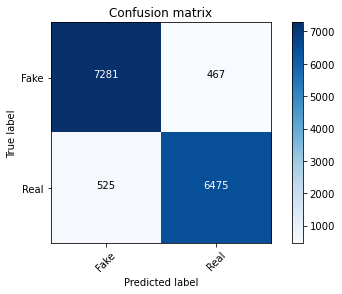

In [34]:
#Confusion Matrix for NBT (Testing)
cm = metrics.confusion_matrix(y_test, predict_nbt)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [35]:
print(metrics.classification_report(y_test,predict_nbt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7748
           1       0.93      0.93      0.93      7000

    accuracy                           0.93     14748
   macro avg       0.93      0.93      0.93     14748
weighted avg       0.93      0.93      0.93     14748



In [36]:
# PassiveAggressiveClassifier
pat_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
pat_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('pa_clf', PassiveAggressiveClassifier(max_iter=50))])

In [37]:
predict_pat = pat_pipeline.predict(X_test) 
score_pat = metrics.accuracy_score(y_test,predict_pat)
print(f'Testing Accuracy: {round(score_pat*100,2)}%')

Testing Accuracy: 99.28%


In [38]:
predict_pat_tr = pat_pipeline.predict(X_train) 
score_pat_tr = metrics.accuracy_score(y_train,predict_pat_tr)
print(f'Training Accuracy: {round(score_pat_tr*100,2)}%')

Training Accuracy: 100.0%


Confusion matrix, without normalization


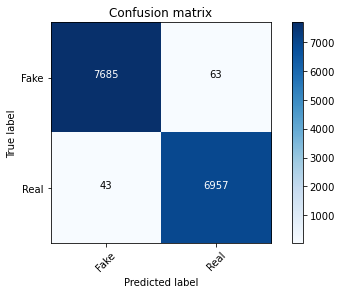

In [39]:
#Confusion Matrix for PAT
cm = metrics.confusion_matrix(y_test, predict_pat)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [40]:
print(metrics.classification_report(y_test,predict_pat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7748
           1       0.99      0.99      0.99      7000

    accuracy                           0.99     14748
   macro avg       0.99      0.99      0.99     14748
weighted avg       0.99      0.99      0.99     14748



In [42]:
#KNN Model
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

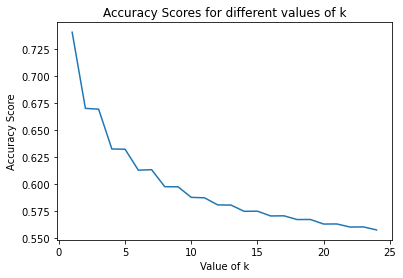

In [43]:
#Finding optimal number of neighbours for kNN model
k_range = list(range(1,25))
scores = []

for k in k_range:
    knn_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('knn_clf',KNeighborsClassifier(n_neighbors=k))])
    knn_pipeline.fit(X_train,y_train)
    y_pred = knn_pipeline.predict(X_test) 
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

In [44]:
knn_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('knn_clf',KNeighborsClassifier(n_neighbors=1))])
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('knn_clf', KNeighborsClassifier(n_neighbors=1))])

In [45]:
predict_knn = knn_pipeline.predict(X_test) 
score_knn = metrics.accuracy_score(y_test,predict_knn)
print(f'Testing Accuracy: {round(score_knn*100,2)}%')

Testing Accuracy: 74.02%


In [46]:
predict_knn_tr = knn_pipeline.predict(X_train) 
score_knn_tr = metrics.accuracy_score(y_train,predict_knn_tr)
print(f'Training Accuracy: {round(score_knn_tr*100,2)}%')

Training Accuracy: 100.0%


Confusion matrix, without normalization


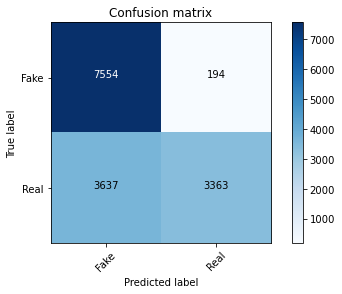

In [47]:
#Confusion Matrix for KNN
cm = metrics.confusion_matrix(y_test, predict_knn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [48]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      7748
           1       0.95      0.48      0.64      7000

    accuracy                           0.74     14748
   macro avg       0.81      0.73      0.72     14748
weighted avg       0.80      0.74      0.72     14748



In [51]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('DT_clf',DecisionTreeClassifier())])
DT_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('DT_clf', DecisionTreeClassifier())])

In [52]:
predict_DT = DT_pipeline.predict(X_test) 
score_DT = metrics.accuracy_score(y_test,predict_DT)
print(f' Testing Accuracy: {round(score_DT*100,2)}%')

 Testing Accuracy: 99.51%


In [53]:
predict_DT_tr = DT_pipeline.predict(X_train) 
score_DT_tr = metrics.accuracy_score(y_train,predict_DT_tr)
print(f' Training Accuracy: {round(score_DT_tr*100,2)}%')

 Training Accuracy: 100.0%


Confusion matrix, without normalization


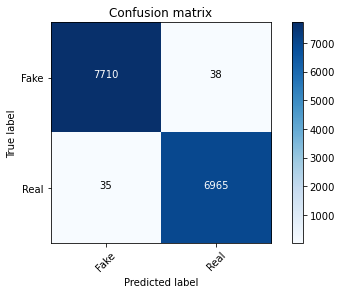

In [54]:
#Confusion Matrix for DT
cm = metrics.confusion_matrix(y_test, predict_DT)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [55]:
print(metrics.classification_report(y_test,predict_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7748
           1       0.99      0.99      0.99      7000

    accuracy                           1.00     14748
   macro avg       1.00      1.00      1.00     14748
weighted avg       1.00      1.00      1.00     14748



In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('LR_clf',LogisticRegression(max_iter=10000, tol=0.1))])
LR_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('LR_clf', LogisticRegression(max_iter=10000, tol=0.1))])

In [57]:
predict_LR = LR_pipeline.predict(X_test) 
score_LR = metrics.accuracy_score(y_test,predict_LR)
print(f'Testing Accuracy: {round(score_LR*100,2)}%')

Testing Accuracy: 98.28%


In [58]:
predict_LR_tr = LR_pipeline.predict(X_train) 
score_LR_tr = metrics.accuracy_score(y_train,predict_LR_tr)
print(f'Training Accuracy: {round(score_LR_tr*100,2)}%')

Training Accuracy: 99.06%


Confusion matrix, without normalization


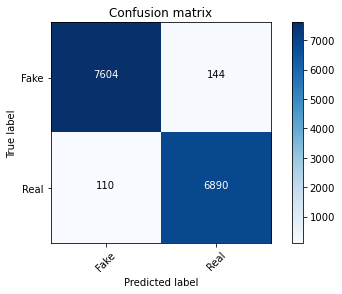

In [59]:
#Confusion Matrix for LR
cm = metrics.confusion_matrix(y_test, predict_LR)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [60]:
print(metrics.classification_report(y_test,predict_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7748
           1       0.98      0.98      0.98      7000

    accuracy                           0.98     14748
   macro avg       0.98      0.98      0.98     14748
weighted avg       0.98      0.98      0.98     14748



In [61]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC_pipeline = Pipeline([
                  ('linear',tfidf_vevtorizer),
                  ('classifier', RandomForestClassifier(random_state = 42))])
RFC_pipeline.fit(X_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('classifier', RandomForestClassifier(random_state=42))])

In [62]:
predict_RFC = RFC_pipeline.predict(X_test) 
score_RFC = metrics.accuracy_score(y_test,predict_RFC)
print(f'Testing Accuracy: {round(score_RFC*100,2)}%')

Testing Accuracy: 98.54%


In [63]:
predict_RFC_tr = RFC_pipeline.predict(X_train) 
score_RFC_tr = metrics.accuracy_score(y_train,predict_RFC_tr)
print(f'Training Accuracy: {round(score_RFC_tr*100,2)}%')

Training Accuracy: 100.0%


Confusion matrix, without normalization


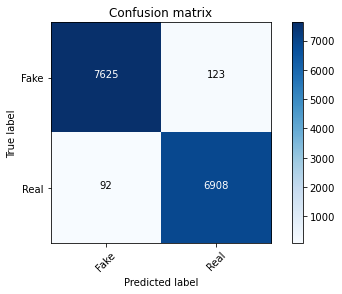

In [64]:
#Confusion Matrix for RFC
cm = metrics.confusion_matrix(y_test, predict_RFC)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [65]:
print(metrics.classification_report(y_test,predict_RFC))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7748
           1       0.98      0.99      0.98      7000

    accuracy                           0.99     14748
   macro avg       0.99      0.99      0.99     14748
weighted avg       0.99      0.99      0.99     14748



In [85]:
#Combining accuracy from all models
Accuracy_scores = pd.DataFrame([{'Model':'Naive Bayes', 'Testing Accuracy':score_nbt*100, 'Training Accuracy':score_nbt_tr*100}, 
                                {'Model':'Passive Aggressive', 'Testing Accuracy':score_pat*100, 'Training Accuracy':score_pat_tr*100}, 
                                {'Model':'KNN', 'Testing Accuracy':score_knn*100, 'Training Accuracy':score_knn_tr*100}, 
                                {'Model':'Logistic Regression', 'Testing Accuracy':score_LR*100, 'Training Accuracy':score_LR_tr*100}, 
                                {'Model':'Decision Tree', 'Testing Accuracy':score_DT*100, 'Training Accuracy':score_DT_tr*100}, 
                                {'Model':'Random Forest', 'Testing Accuracy':score_RFC*100, 'Training Accuracy':score_RFC_tr*100}])
Accuracy_scores

,Model,Testing Accuracy,Training Accuracy
0,Naive Bayes,93.273664,94.265389
1,Passive Aggressive,99.281258,99.996660
2,KNN,74.023596,99.996660
3,Logistic Regression,98.277733,99.064827
4,Decision Tree,99.505018,99.996660
5,Random Forest,98.542175,99.996660


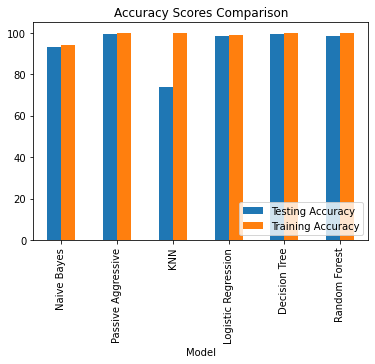

In [87]:
# plot grouped bar chart
Accuracy_scores.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Accuracy Scores Comparison').legend(loc='lower right')

In [88]:
#Testing randomm news for Decision Tree
#Saving final model
import pickle
model_file = 'final_model.sav'
pickle.dump(DT_pipeline,open(model_file,'wb'))

In [92]:
#Function to predict the news
def news_prediction(var):
    load_model = pickle.load(open('final_model.sav','rb'))
    pred = load_model.predict([var])
    
    return(print(pred[0]))

In [93]:
news_prediction(x[100])

0


In [94]:
y[100]

0

In [95]:
news_prediction(x[10005])

1


In [96]:
y[10005]

1

In [97]:
news_prediction(x[528])

1


In [98]:
y[528]

1

In [99]:
news_prediction(x[22578])

1


In [100]:
y[22578]

1

In [101]:
news_prediction("NATO estimated on Wednesday that 7,000 to 15,000 Russian soldiers have been led in four weeks of fighting in Ukraine")

0
